### Installing all the required dependencies

In [1]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

### Loading MoveNet

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Load the MoveNet model
model = mp_pose.Pose(
    static_image_mode=False, 
    model_complexity=2, 
    min_detection_confidence=0.5, 
    min_tracking_confidence=0.5
)

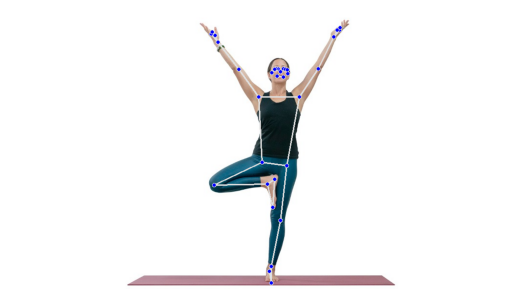

In [3]:
def detect_pose(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Run the pose detection model
    results = model.process(image)

    # Draw the pose landmarks on the image
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image, 
        results.pose_landmarks, 
        mp_pose.POSE_CONNECTIONS
    )

    # Display the image
    plt.imshow(annotated_image)
    plt.axis('off')
    plt.show()

# Detect pose in an image
detect_pose('TP.jpg')